## ✅ **Phase I – Principal Commodity-wise Export Data Analysis (2022–23)**

### 🔹 **Objective**

To perform a comprehensive **Exploratory Data Analysis (EDA)**, apply **unsupervised learning (clustering)**, derive strategic business insights, and create an interactive **Streamlit Dashboard** for data storytelling using India's export data.

---

### 📁 **1. Dataset Overview**

* Source: Principal Commodity-wise Export Data (2022–23)
* Key Columns:

  * `COMMODITY_NAME`
  * `COUNTRY`
  * `UNIT` (e.g., KGS, TON)
  * `QUANTITY_KGS`
  * `VALUE_USD_MILLION`
  * `PRICE_PER_KG` (derived)

---

### 🧹 **2. Data Cleaning & Preprocessing**

* Renamed columns for consistency and readability.
* Removed duplicates and missing values.
* Handled outliers and inconsistent units.
* Derived the `PRICE_PER_KG` column as:

  $$
  \text{PRICE\_PER\_KG} = \frac{\text{VALUE\_USD\_MILLION} \times 10^6}{\text{QUANTITY\_KGS}}
  $$
* Final cleaned dataset saved as `Cleaned_Principal_Commodity_Exports.xlsx`.

---

### 📊 **3. Exploratory Data Analysis (EDA)**

* **Top Exported Commodities** by value and quantity.
* **Top Exporting Countries**.
* **Commodity Distribution** per country.
* **Heatmaps & Correlations** between variables.
* **Bar charts, Pie charts, Treemaps** for deeper insights.

---

### 💡 **4. Advanced Strategic Analysis**

* Identified:

  * Most **expensive** and **cheapest** commodities.
  * **High-volume, low-value** exports (inefficiency zone).
  * **High-value, low-volume** exports (premium zone).
* Created business intelligence-like summaries.

---

### 📈 **5. Clustering Analysis (Unsupervised ML)**

* Applied **KMeans clustering** on:

  * `VALUE_USD_MILLION`
  * `QUANTITY_KGS`
  * `PRICE_PER_KG`
* Determined optimal `k = 4` using:

  * Elbow Method
  * Silhouette Score
* Interpreted clusters with meaningful business tags.
* Saved the dataset with a new `CLUSTER` column.

---

### 🧠 **6. Dimensionality Reduction**

* Applied **Principal Component Analysis (PCA)** to reduce to 2D.
* Visualized clusters in 2D space.

---

### 📊 **7. Streamlit Dashboard**

* Created an **interactive, attractive, and professional dashboard** using Streamlit.
* Features:

  * Commodity filter
  * Country filter
  * Cluster insights
  * Smart storytelling with visuals
  * User-friendly and responsive layout

---

### 📂 **8. GitHub Documentation**

* Prepared a detailed, structured, and engaging **README file**:

  * Project overview
  * Tech stack
  * Features
  * Installation guide
  * Screenshots
  * Credits & future scope

---

### ✅ **Phase I Status: COMPLETED SUCCESSFULLY**

* 🔒 Data cleaned and structured.
* 📊 Exploratory and strategic insights delivered.
* 🤖 Machine learning implemented (clustering).
* 🖥️ Dashboard deployed via Streamlit.
* 📄 Documentation prepared for GitHub.


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore, iqr
from datetime import datetime 

In [2]:
file_path = r"C:\Users\athar\OneDrive\Desktop\College\DS_ML_Analysis\22070521071_CA1_EDA (Raw).xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# STEP 2: Basic Inspection
print("✅ Shape of dataset:", df.shape)
print("\n✅ First 5 rows:\n", df.head())
print("\n✅ Columns:\n", df.columns)
print("\n✅ Data types:\n", df.dtypes)
print("\n✅ Missing values:\n", df.isnull().sum())

✅ Shape of dataset: (24050, 5)

✅ First 5 rows:
                                  PRINCIPLE COMMODITY      COUNTRY UNIT  \
0  TEA                                           ...  AFGHANISTAN  KGS   
1  TEA                                           ...      ALBANIA  KGS   
2  TEA                                           ...      ALGERIA  KGS   
3  TEA                                           ...      ANDORRA  KGS   
4  TEA                                           ...       ANGOLA  KGS   

   QUANTITY  Value(US$ million)  
0  423549.0                0.87  
1   13440.0                0.07  
2   36505.0                0.06  
3      62.0                0.00  
4   92287.0                0.51  

✅ Columns:
 Index(['PRINCIPLE COMMODITY', 'COUNTRY', 'UNIT', 'QUANTITY',
       'Value(US$ million)'],
      dtype='object')

✅ Data types:
 PRINCIPLE COMMODITY     object
COUNTRY                 object
UNIT                    object
QUANTITY               float64
Value(US$ million)     float64
dtype

In [3]:
# ✅ Step 1: Rename columns for clarity
df = df.rename(columns={
    'PRINCIPLE COMMODITY': 'COMMODITY_NAME',
    'COUNTRY': 'COUNTRY',
    'UNIT': 'UNIT',
    'QUANTITY': 'QUANTITY_KGS',
    'Value(US$ million)': 'VALUE_USD_MILLION'
})
print ("\n✅ Columns after renaming:\n", df.columns)

# ✅ Step 2: Drop rows with missing data (if any)
df = df.dropna()

# ✅ Step 3: Ensure numeric types for QUANTITY and VALUE
df['QUANTITY_KGS'] = pd.to_numeric(df['QUANTITY_KGS'], errors='coerce')
df['VALUE_USD_MILLION'] = pd.to_numeric(df['VALUE_USD_MILLION'], errors='coerce')

# Drop rows with NaN after conversion
df = df.dropna(subset=['QUANTITY_KGS', 'VALUE_USD_MILLION'])

# ✅ Step 4: Engineer a new column — PRICE_PER_KG
df['PRICE_PER_KG'] = (df['VALUE_USD_MILLION'] * 1_000_000) / df['QUANTITY_KGS']

# ✅ Step 5: Reset index (optional but clean)
df.reset_index(drop=True, inplace=True)

# Preview cleaned DataFrame
df.head()
# Save the cleaned DataFrame to a new Excel file
output_file_path = r"C:\Users\athar\OneDrive\Desktop\College\DS_ML_Analysis\Cleaned_Principal_Commodity_Exports.xlsx"
df.to_excel(output_file_path, index=False, engine='openpyxl')



✅ Columns after renaming:
 Index(['COMMODITY_NAME', 'COUNTRY', 'UNIT', 'QUANTITY_KGS',
       'VALUE_USD_MILLION'],
      dtype='object')


In [4]:
# Shape of dataset
print("Shape:", df.shape)

# Data types and nulls
print("\nInfo:")
print(df.info())

Shape: (3609, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COMMODITY_NAME     3609 non-null   object 
 1   COUNTRY            3609 non-null   object 
 2   UNIT               3609 non-null   object 
 3   QUANTITY_KGS       3609 non-null   float64
 4   VALUE_USD_MILLION  3609 non-null   float64
 5   PRICE_PER_KG       3050 non-null   float64
dtypes: float64(3), object(3)
memory usage: 169.3+ KB
None


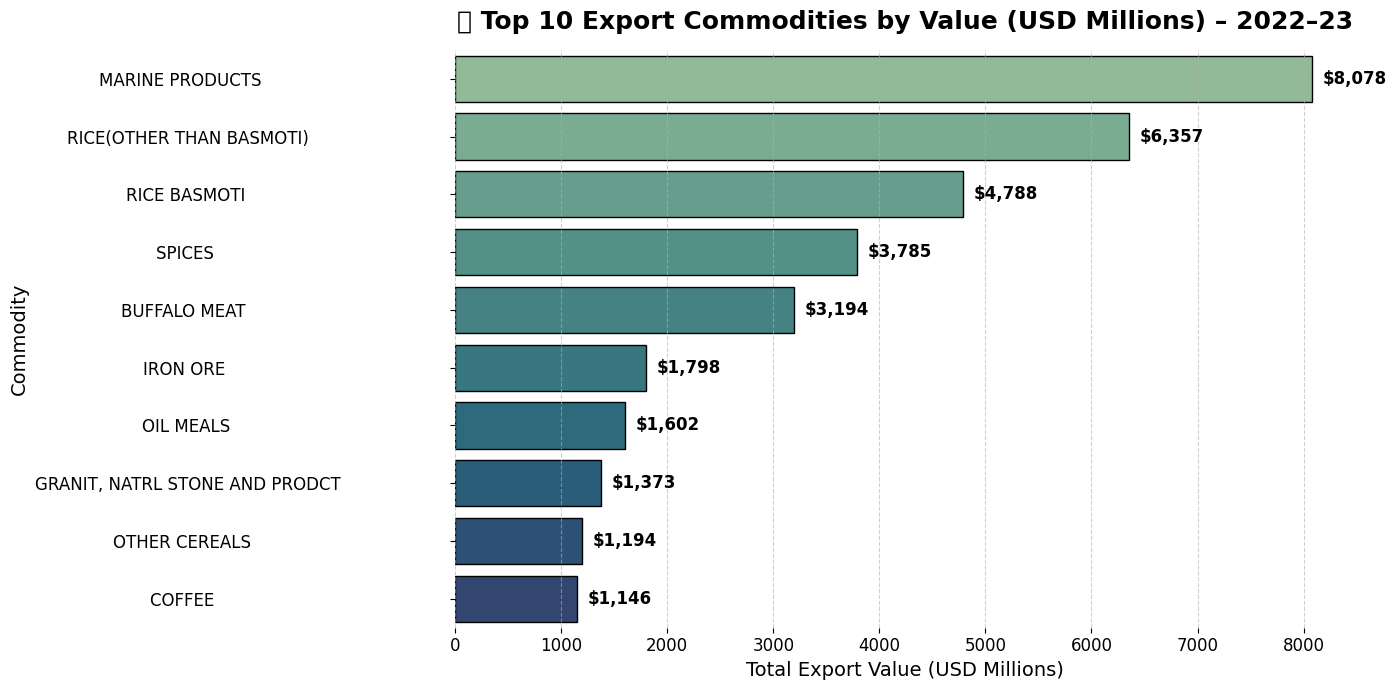

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload top_value in case needed
top_value = df.groupby('COMMODITY_NAME')['VALUE_USD_MILLION'].sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x=top_value.values, 
    y=top_value.index, 
    palette='crest', 
    edgecolor='black'
)

# Add value labels to each bar
for i, v in enumerate(top_value.values):
    barplot.text(v + 100, i, f"${v:,.0f}", va='center', fontweight='bold', fontsize=12)

# Title and styling
plt.title("🔝 Top 10 Export Commodities by Value (USD Millions) – 2022–23", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Total Export Value (USD Millions)", fontsize=14)
plt.ylabel("Commodity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

# Background
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



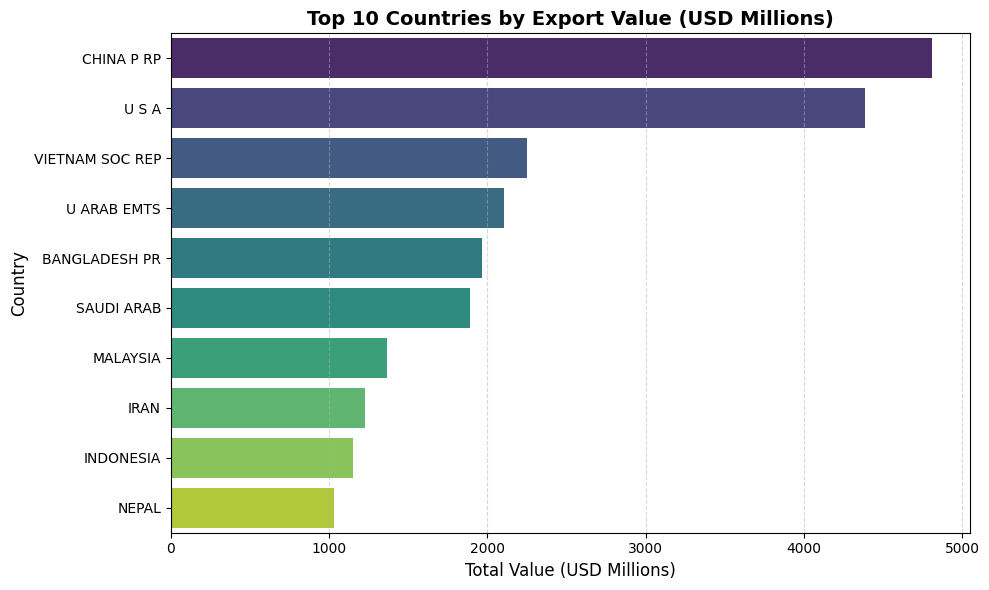

In [6]:
# Grouping and sorting
top_countries = df.groupby('COUNTRY')['VALUE_USD_MILLION'] \
                  .sum() \
                  .sort_values(ascending=False) \
                  .head(10)

# Plotting
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(top_countries))

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette=colors
)

plt.title('Top 10 Countries by Export Value (USD Millions)', fontsize=14, weight='bold')
plt.xlabel('Total Value (USD Millions)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


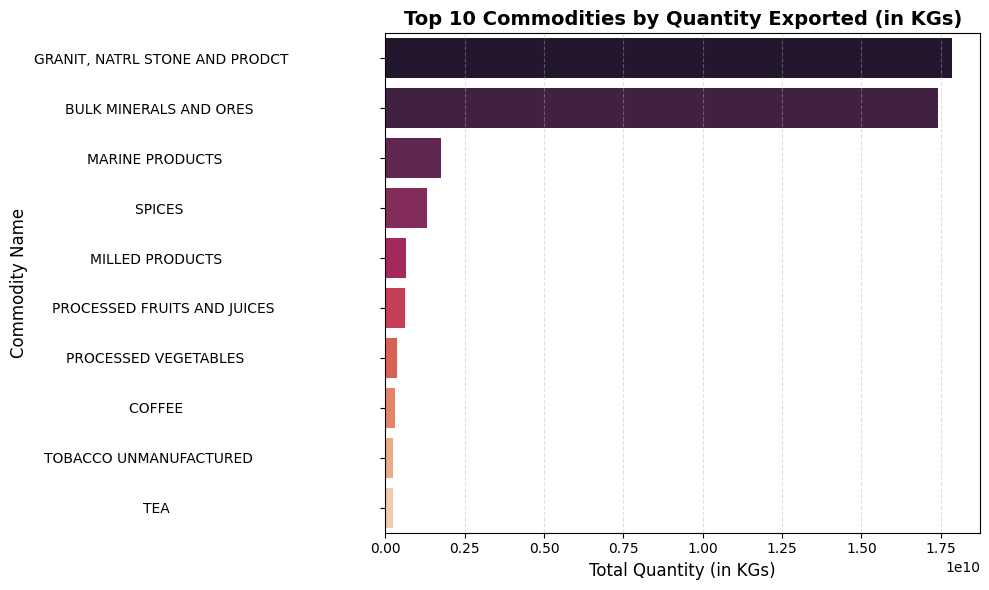

In [7]:
# Grouping and sorting
top_commodities_by_quantity = df.groupby('COMMODITY_NAME')['QUANTITY_KGS'] \
                                .sum() \
                                .sort_values(ascending=False) \
                                .head(10)

# Plotting
plt.figure(figsize=(10, 6))
colors = sns.color_palette("rocket", len(top_commodities_by_quantity))

sns.barplot(
    x=top_commodities_by_quantity.values,
    y=top_commodities_by_quantity.index,
    palette=colors
)

plt.title('Top 10 Commodities by Quantity Exported (in KGs)', fontsize=14, weight='bold')
plt.xlabel('Total Quantity (in KGs)', fontsize=12)
plt.ylabel('Commodity Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


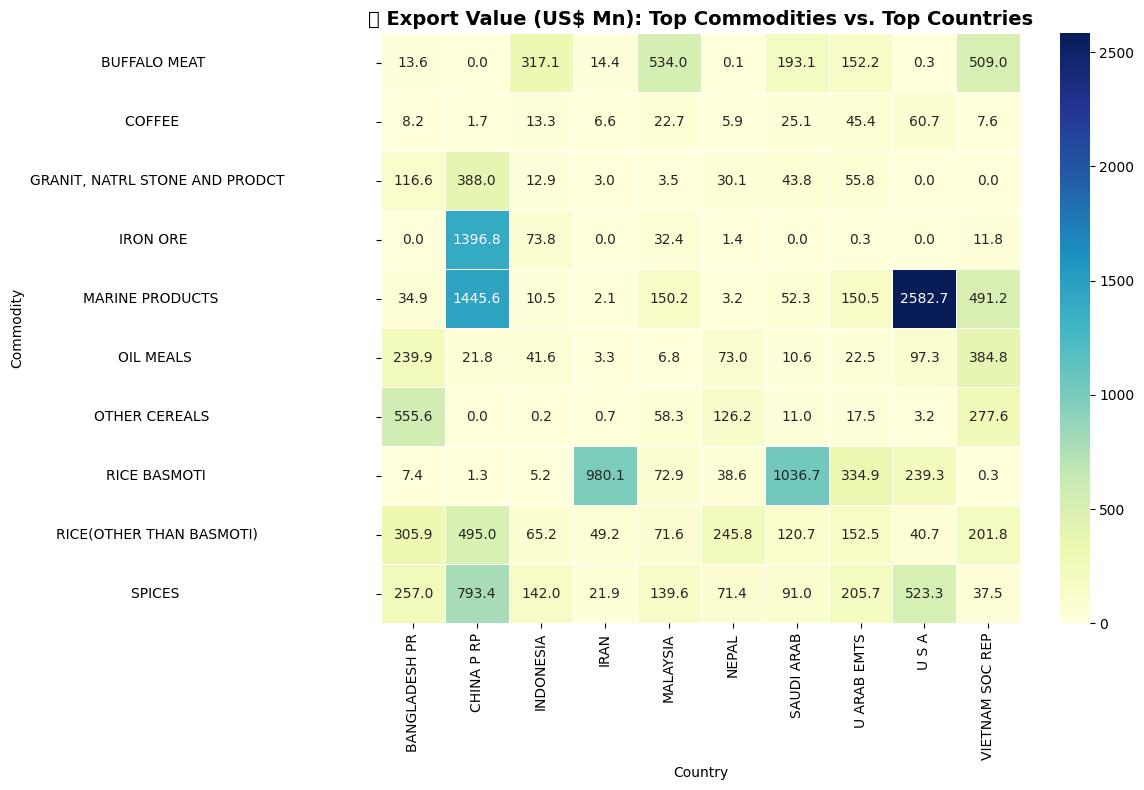

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 countries and top 10 commodities by total export value
top_countries = df.groupby('COUNTRY')['VALUE_USD_MILLION'].sum().nlargest(10).index
top_commodities = df.groupby('COMMODITY_NAME')['VALUE_USD_MILLION'].sum().nlargest(10).index

# Filter dataset
heatmap_df = df[df['COUNTRY'].isin(top_countries) & df['COMMODITY_NAME'].isin(top_commodities)]

# Create pivot table
pivot = heatmap_df.pivot_table(
    index='COMMODITY_NAME',
    columns='COUNTRY',
    values='VALUE_USD_MILLION',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('🔍 Export Value (US$ Mn): Top Commodities vs. Top Countries', fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()


In [9]:
# 📌 Feature Engineering: Add PRICE_PER_KG
df['PRICE_PER_KG'] = df['VALUE_USD_MILLION'] * 1e6 / df['QUANTITY_KGS']

# 📌 Drop rows with zero or null values in key columns
df_cleaned = df.dropna(subset=['QUANTITY_KGS', 'VALUE_USD_MILLION', 'PRICE_PER_KG'])
df_cleaned = df_cleaned[df_cleaned['QUANTITY_KGS'] > 0]

# 📌 Features for Clustering
features = ['QUANTITY_KGS', 'VALUE_USD_MILLION', 'PRICE_PER_KG']
X = df_cleaned[features]

# 📌 Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

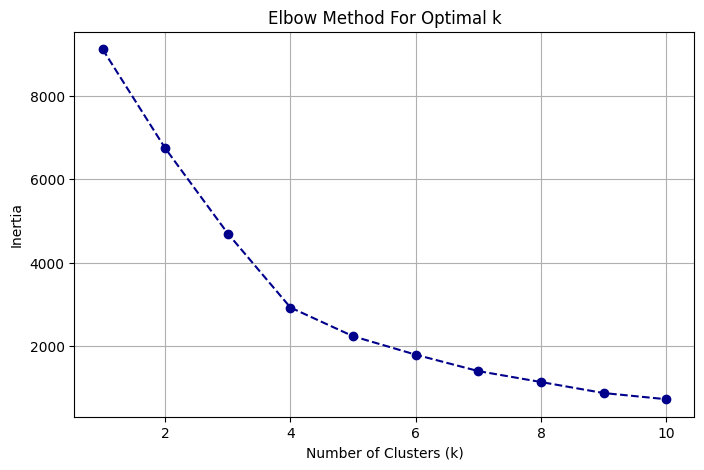

KMeans(n_clusters=4, n_init=10, random_state=42)

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 📌 Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 📌 Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'o--', color='darkblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()
# 📌 Optimal number of clusters
optimal_k = 4  # Based on the elbow plot, adjust as needed
# 📌 Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)


In [11]:
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare clustering features
features = ['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG']
X = df_cleaned[features]

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: KMeans
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Step 4: Check cluster counts
print(df_cleaned['Cluster'].value_counts())

cluster_summary = df_cleaned.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)


Cluster
0    2930
2     102
3       6
1       2
Name: count, dtype: int64
         VALUE_USD_MILLION  QUANTITY_KGS  PRICE_PER_KG
Cluster                                               
0                    11.48  7.865248e+06        425.86
1                   156.09  8.624279e+09          0.02
2                     4.11  5.593000e+02       8089.62
3                  1372.55  1.642910e+08        359.78


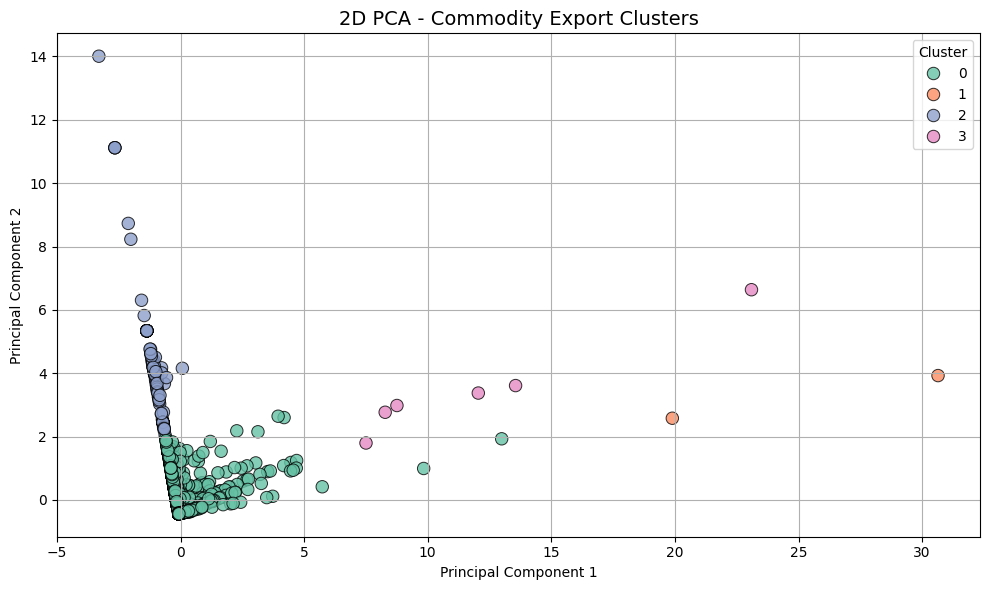

In [12]:
from sklearn.decomposition import PCA

# Reduce to 2 components for 2D and 3D plotting
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]
df_cleaned['PCA3'] = X_pca[:, 2]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80, alpha=0.8, edgecolor='black')
plt.title('2D PCA - Commodity Export Clusters', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()



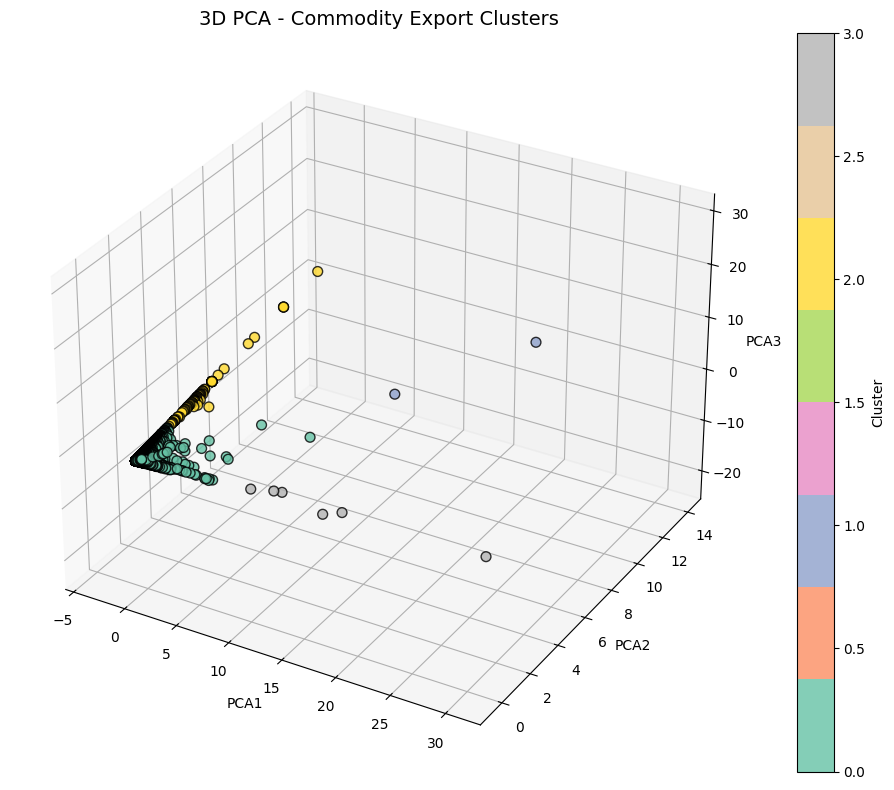

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_cleaned['PCA1'], df_cleaned['PCA2'], df_cleaned['PCA3'],
                     c=df_cleaned['Cluster'], cmap='Set2', s=50, alpha=0.8, edgecolor='black')

ax.set_title('3D PCA - Commodity Export Clusters', fontsize=14)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


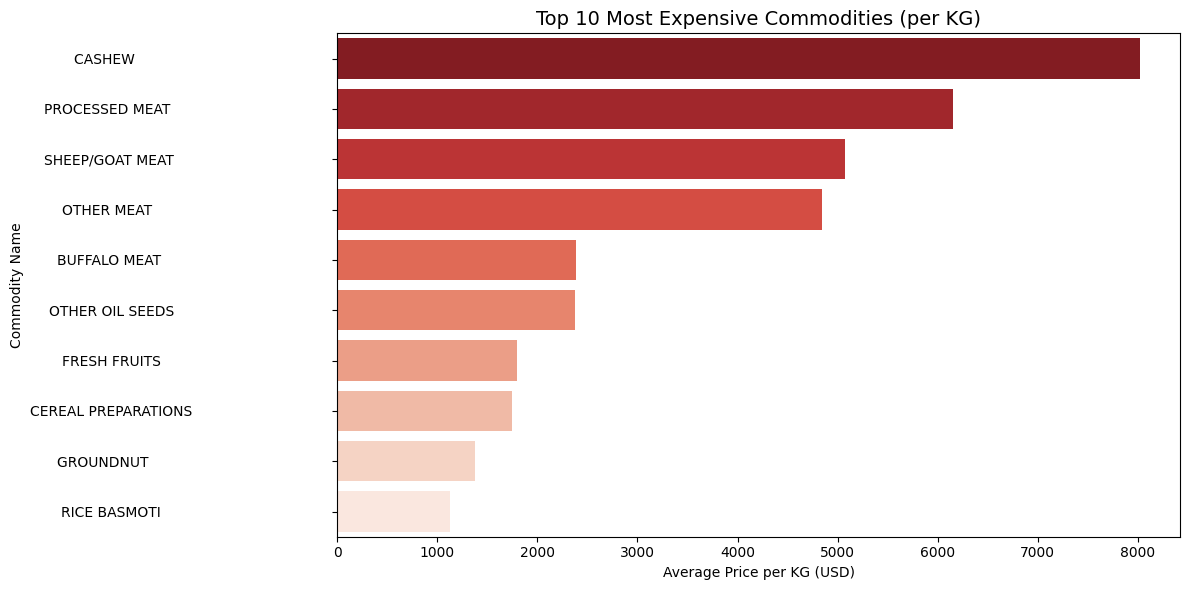

In [14]:
# Step 1: Top 10 Most Expensive Commodities per KG
top_expensive = df_cleaned.groupby('COMMODITY_NAME')['PRICE_PER_KG'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive.values, y=top_expensive.index, palette='Reds_r')
plt.title('Top 10 Most Expensive Commodities (per KG)', fontsize=14)
plt.xlabel('Average Price per KG (USD)')
plt.ylabel('Commodity Name')
plt.tight_layout()
plt.show()

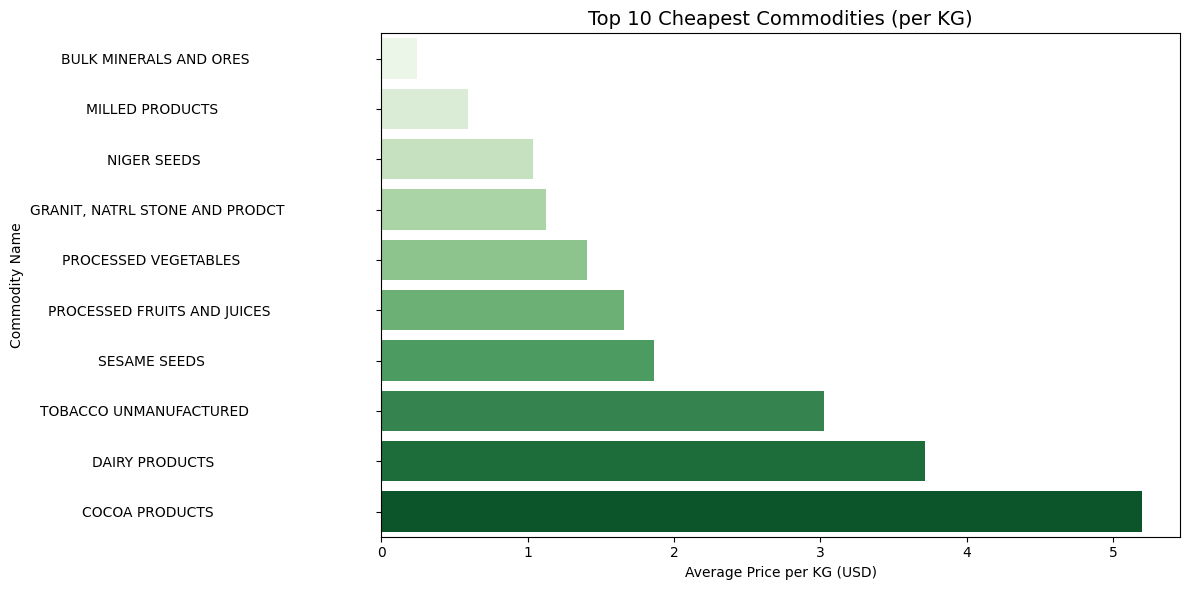

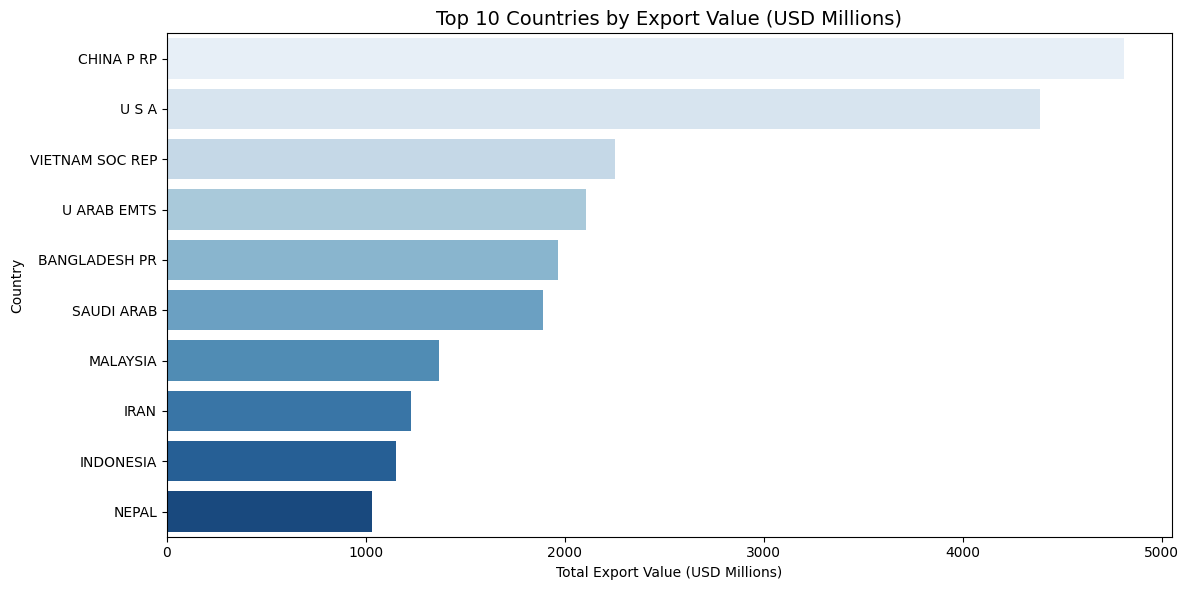

In [15]:
# Step 2: Top 10 Cheapest Commodities per KG
cheapest = df_cleaned.groupby('COMMODITY_NAME')['PRICE_PER_KG'].mean().sort_values().head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=cheapest.values, y=cheapest.index, palette='Greens')
plt.title('Top 10 Cheapest Commodities (per KG)', fontsize=14)
plt.xlabel('Average Price per KG (USD)')
plt.ylabel('Commodity Name')
plt.tight_layout()
plt.show()
# Step 3: Top 10 Countries by Export Value
top_countries = df_cleaned.groupby('COUNTRY')['VALUE_USD_MILLION'].sum().sort_values(ascending=False).head(10)
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues')
plt.title('Top 10 Countries by Export Value (USD Millions)', fontsize=14)
plt.xlabel('Total Export Value (USD Millions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

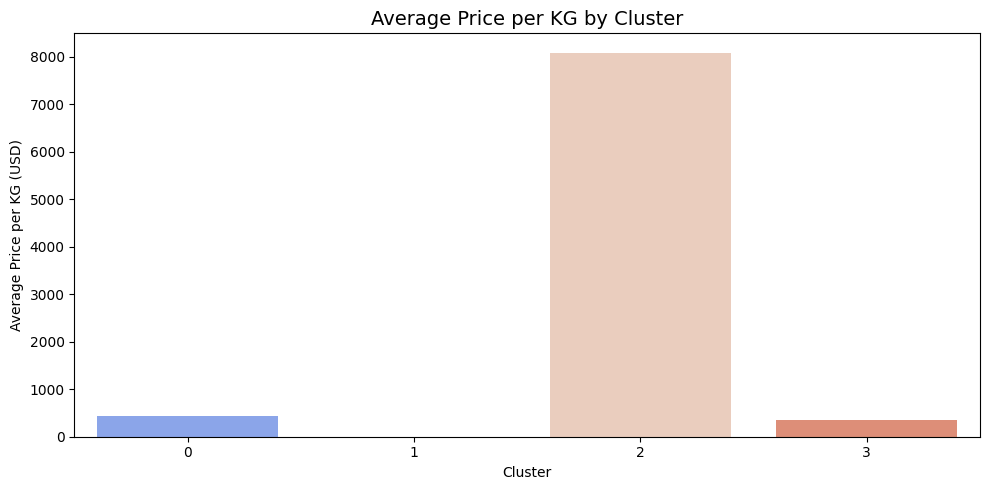

In [16]:
# Step 3: Average Price per KG for each Cluster
cluster_avg_price = df_cleaned.groupby('Cluster')['PRICE_PER_KG'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_avg_price.index, y=cluster_avg_price.values, palette='coolwarm')
plt.title('Average Price per KG by Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Average Price per KG (USD)')
plt.tight_layout()
plt.show()

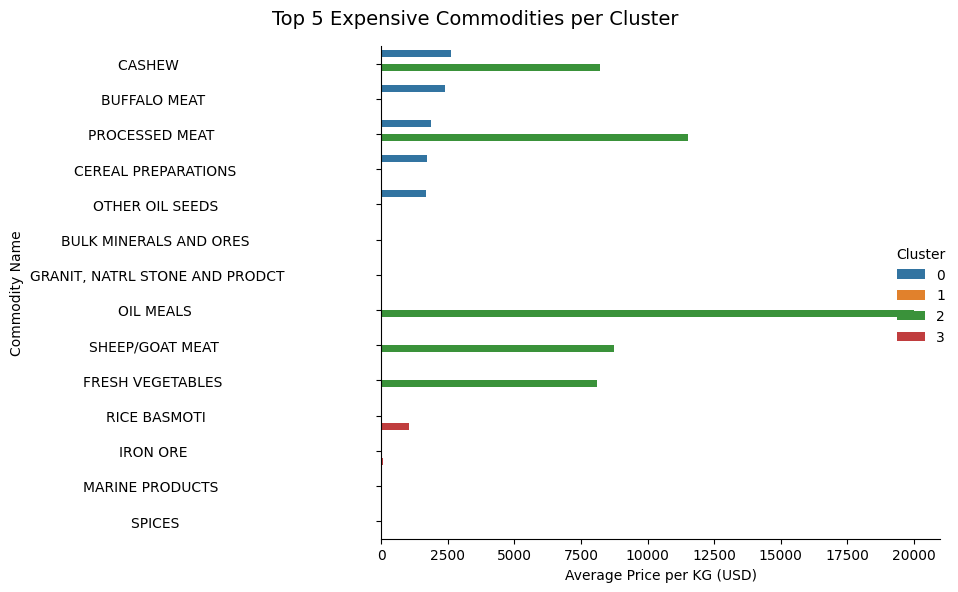

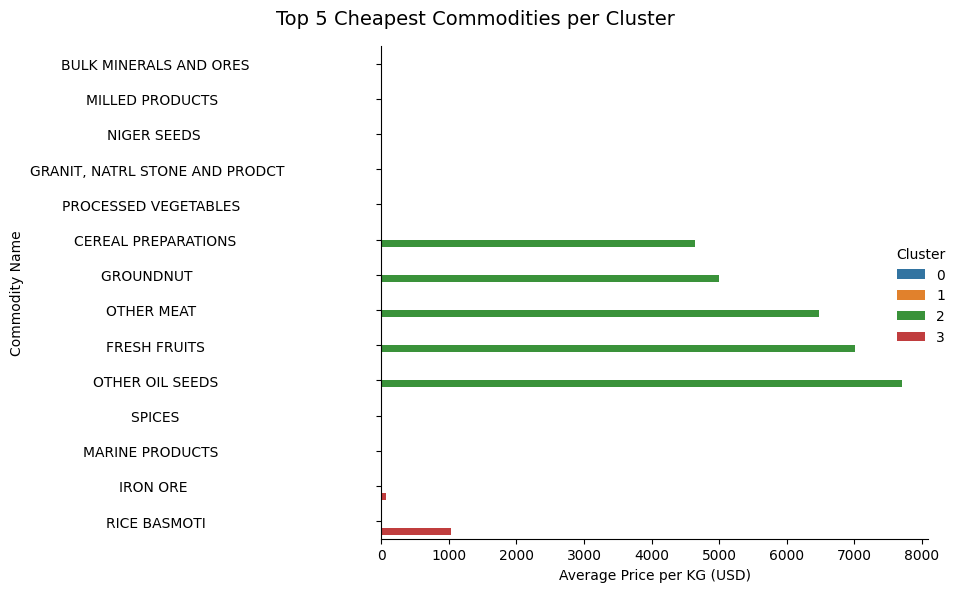

In [17]:
# Step 4: Top 5 Expensive Commodities per Cluster
top_per_cluster = df_cleaned.groupby(['Cluster', 'COMMODITY_NAME'])['PRICE_PER_KG'].mean().reset_index()
top5_clustered = top_per_cluster.groupby('Cluster').apply(lambda x: x.sort_values(by='PRICE_PER_KG', ascending=False).head(5)).reset_index(drop=True)

# Plotting
g = sns.catplot(
    data=top5_clustered,
    kind='bar',
    x='PRICE_PER_KG',
    y='COMMODITY_NAME',
    hue='Cluster',
    palette='tab10',
    height=6,
    aspect=1.5
)
g.fig.suptitle('Top 5 Expensive Commodities per Cluster', fontsize=14)
g.set_axis_labels("Average Price per KG (USD)", "Commodity Name")
plt.tight_layout()
plt.show()
# Step 5: Top 5 Cheapest Commodities per Cluster
bottom5_clustered = top_per_cluster.groupby('Cluster').apply(lambda x: x.sort_values(by='PRICE_PER_KG').head(5)).reset_index(drop=True)
# Plotting
g = sns.catplot(
    data=bottom5_clustered,
    kind='bar',
    x='PRICE_PER_KG',
    y='COMMODITY_NAME',
    hue='Cluster',
    palette='tab10',
    height=6,
    aspect=1.5
)
g.fig.suptitle('Top 5 Cheapest Commodities per Cluster', fontsize=14)
g.set_axis_labels("Average Price per KG (USD)", "Commodity Name")
plt.tight_layout()
plt.show()

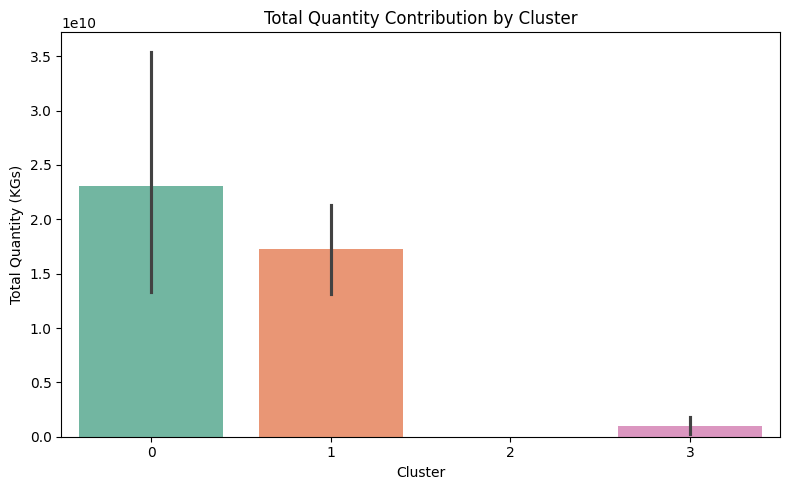

In [18]:
# Step 5: Cluster Profiling Summary
cluster_profile = df_cleaned.groupby('Cluster')[['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG']].agg(['mean', 'median', 'max', 'min', 'std']).round(2)
cluster_profile
# Step 6: Cluster vs Quantity Contribution
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cleaned, x='Cluster', y='QUANTITY_KGS', estimator='sum', palette='Set2')
plt.title('Total Quantity Contribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity (KGs)')
plt.tight_layout()
plt.show()



🌍 Cluster 0 - Top 5 Exporting Countries
COUNTRY
BHUTAN             28
VIETNAM SOC REP    27
JORDAN             26
MALAYSIA           26
QATAR              26
Name: count, dtype: int64

🌍 Cluster 1 - Top 5 Exporting Countries
COUNTRY
CHINA P RP       1
BANGLADESH PR    1
Name: count, dtype: int64

🌍 Cluster 2 - Top 5 Exporting Countries
COUNTRY
NIGERIA        5
KUWAIT         4
U ARAB EMTS    4
MALDIVES       3
SAUDI ARAB     3
Name: count, dtype: int64

🌍 Cluster 3 - Top 5 Exporting Countries
COUNTRY
CHINA P RP    3
IRAN          1
SAUDI ARAB    1
U S A         1
Name: count, dtype: int64


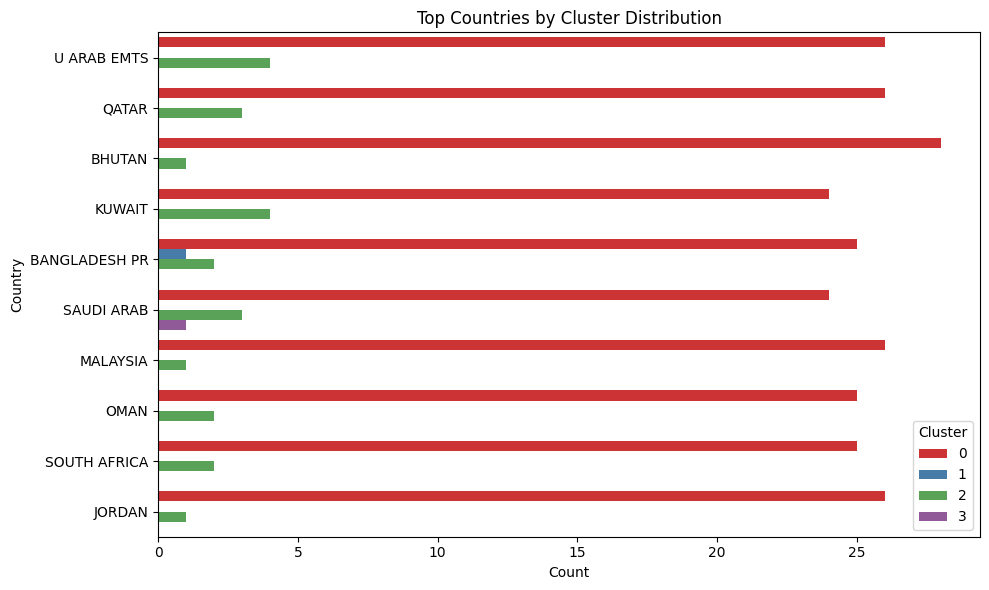

In [19]:
# Step 7: Top 5 Exporting Countries per Cluster
for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    print(f"\n🌍 Cluster {cluster_id} - Top 5 Exporting Countries")
    top_countries = df_cleaned[df_cleaned['Cluster'] == cluster_id]['COUNTRY'].value_counts().head(5)
    print(top_countries)

# Optional: Visualize Cluster-Country Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, y='COUNTRY', hue='Cluster', order=df_cleaned['COUNTRY'].value_counts().head(10).index, palette='Set1')
plt.title("Top Countries by Cluster Distribution")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


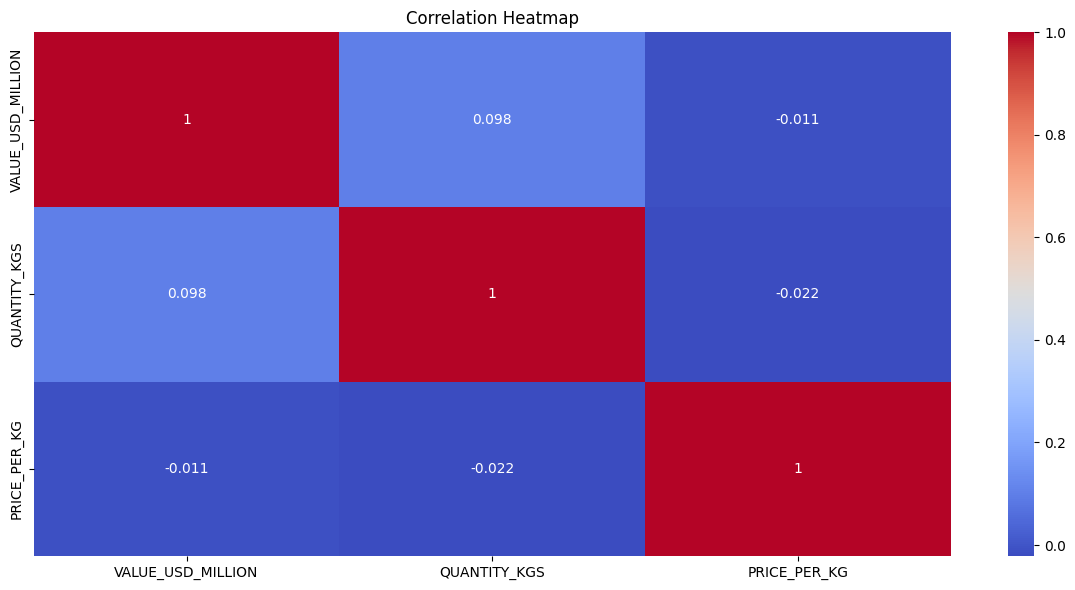

In [20]:
# Step 8: Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned[['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

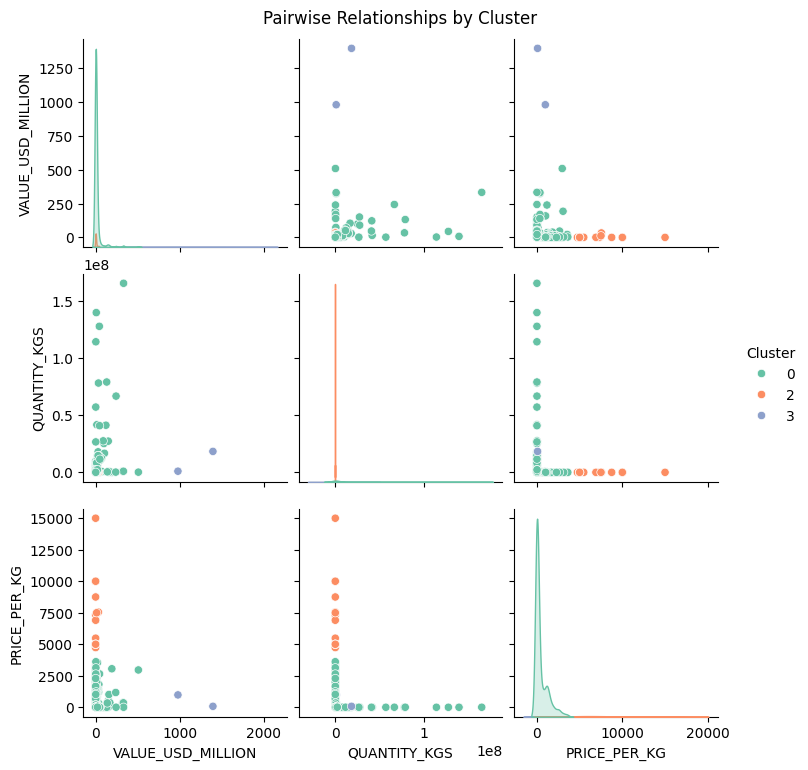

In [21]:
import seaborn as sns

# Sample subset to avoid overplotting
df_sample = df_cleaned.sample(n=500, random_state=42)

# Step 9: Pairplot to visualize clusters
sns.pairplot(df_sample[['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG', 'Cluster']],
             hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Pairwise Relationships by Cluster", y=1.02)
plt.show()

In [22]:
# Step 10: Cluster-wise KPI Summary
summary_df = df_cleaned.groupby('Cluster').agg({
    'VALUE_USD_MILLION': 'sum',
    'QUANTITY_KGS': 'sum',
    'PRICE_PER_KG': 'mean',
    'COUNTRY': lambda x: x.mode()[0],
    'COMMODITY_NAME': lambda x: x.mode()[0]
}).rename(columns={
    'VALUE_USD_MILLION': 'Total_Export_Value',
    'QUANTITY_KGS': 'Total_Quantity_KGS',
    'PRICE_PER_KG': 'Avg_Price_per_KG',
    'COUNTRY': 'Top_Country',
    'COMMODITY_NAME': 'Top_Commodity'
}).reset_index()

summary_df

,Cluster,Total_Export_Value,Total_Quantity_KGS,Avg_Price_per_KG,Top_Country,Top_Commodity
0,0,33649.89,2.304518e+10,425.862710,BHUTAN,SPICES ...
1,1,312.18,1.724856e+10,0.020346,BANGLADESH PR,BULK MINERALS AND ORES ...
2,2,419.13,5.704900e+04,8089.620714,NIGERIA,CASHEW ...
3,3,8235.31,9.857462e+08,359.780446,CHINA P RP,MARINE PRODUCTS ...


In [23]:
# Step 1: Check mean values of each feature per cluster
cluster_profile = df_cleaned.groupby('Cluster')[['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG']].mean().round(2)
cluster_profile['Count'] = df_cleaned['Cluster'].value_counts().sort_index()
cluster_profile

,VALUE_USD_MILLION,QUANTITY_KGS,PRICE_PER_KG,Count
Cluster,,,,
0,11.48,7.865248e+06,425.86,2930
1,156.09,8.624279e+09,0.02,2
2,4.11,5.593000e+02,8089.62,102
3,1372.55,1.642910e+08,359.78,6


In [24]:
# Define labels based on your actual data insights
cluster_labels = {
    0: 'Low Value - High Volume',
    1: 'High Price - Low Volume',
    2: 'Mid Value - Mid Volume',
    3: 'High Value - Moderate Volume'
}

# Map to a new column
df_cleaned['Cluster_Label'] = df_cleaned['Cluster'].map(cluster_labels)


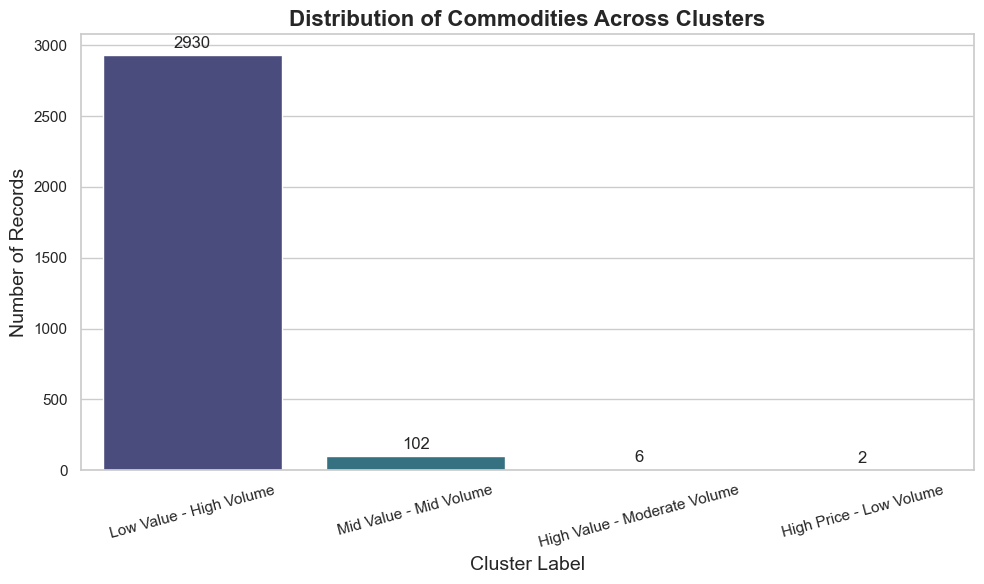

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot cluster distribution
ax = sns.countplot(data=df_cleaned, x='Cluster_Label', palette='viridis', order=df_cleaned['Cluster_Label'].value_counts().index)

# Add value annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=12)

# Styling
plt.title("Distribution of Commodities Across Clusters", fontsize=16, fontweight='bold')
plt.xlabel("Cluster Label", fontsize=14)
plt.ylabel("Number of Records", fontsize=14)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df_cleaned['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.8484927439282145


In [27]:
from sklearn.metrics import silhouette_score

# Use the scaled features and cluster labels
sil_score = silhouette_score(X_scaled, df_cleaned['Cluster'])
print(f"Silhouette Score for k=4: {sil_score:.3f}")

Silhouette Score for k=4: 0.848


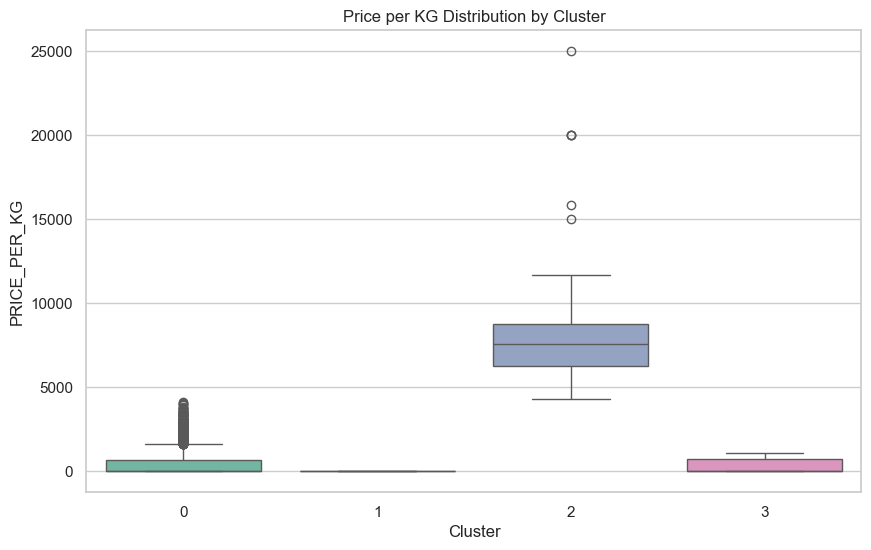

In [28]:
# Grouping by cluster and computing mean values
cluster_summary = df_cleaned.groupby('Cluster')[['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG']].mean().round(2)
cluster_summary

# Getting top 5 commodities (by value) per cluster
top_commodities = df_cleaned.groupby('Cluster')['COMMODITY_NAME'].value_counts().groupby(level=0).nlargest(5)
top_commodities

plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='Cluster', y='PRICE_PER_KG', palette='Set2')
plt.title('Price per KG Distribution by Cluster')
plt.show()


In [29]:
df_cleaned.to_excel("Cleaned_Principal_Commodity_Exports_with_clusters.xlsx", index=False)

<Figure size 1000x600 with 0 Axes>

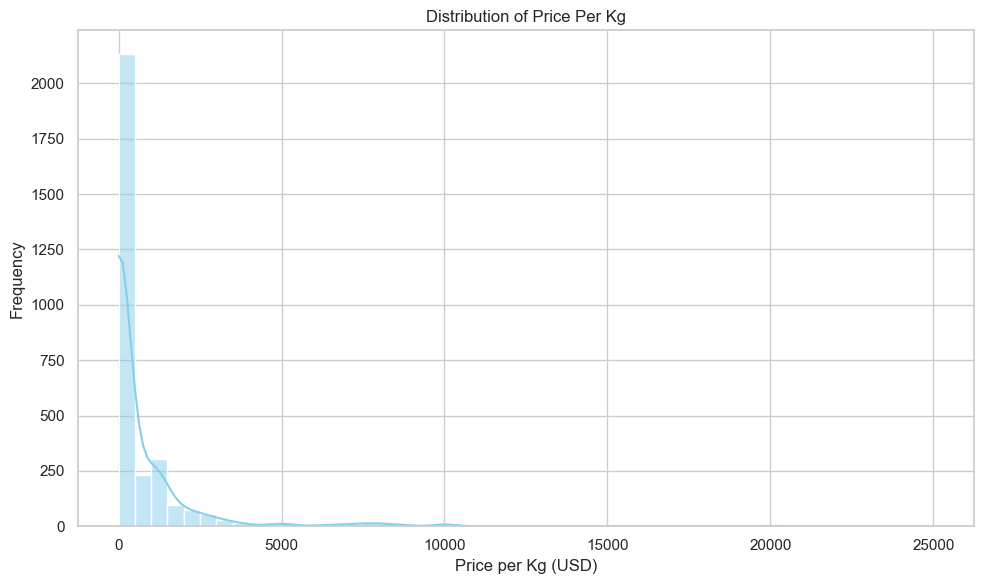

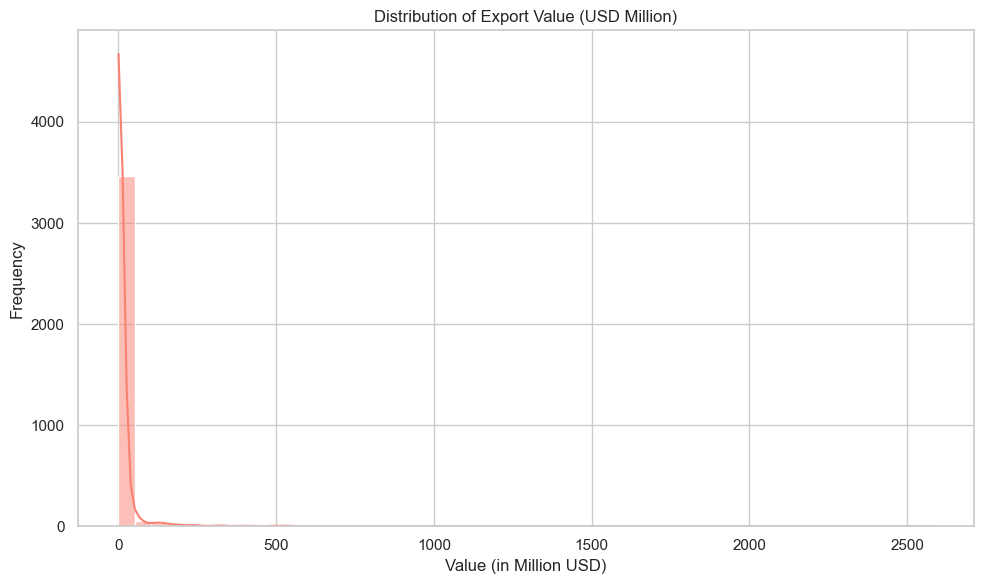

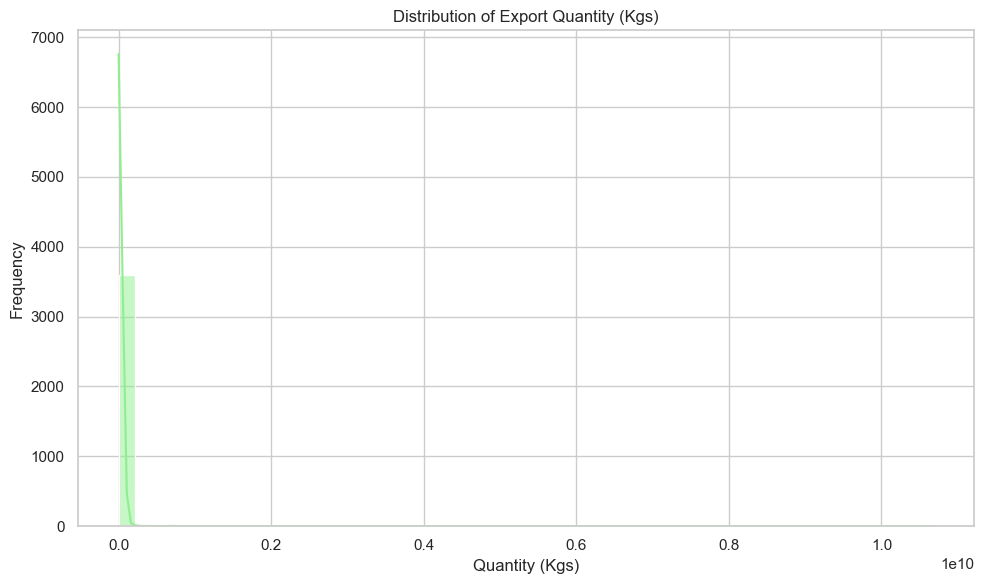

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Histogram: PRICE_PER_KG
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE_PER_KG'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Price Per Kg')
plt.xlabel('Price per Kg (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram: VALUE_USD_MILLION
plt.figure(figsize=(10, 6))
sns.histplot(df['VALUE_USD_MILLION'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Export Value (USD Million)')
plt.xlabel('Value (in Million USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram: QUANTITY_KGS
plt.figure(figsize=(10, 6))
sns.histplot(df['QUANTITY_KGS'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Export Quantity (Kgs)')
plt.xlabel('Quantity (Kgs)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

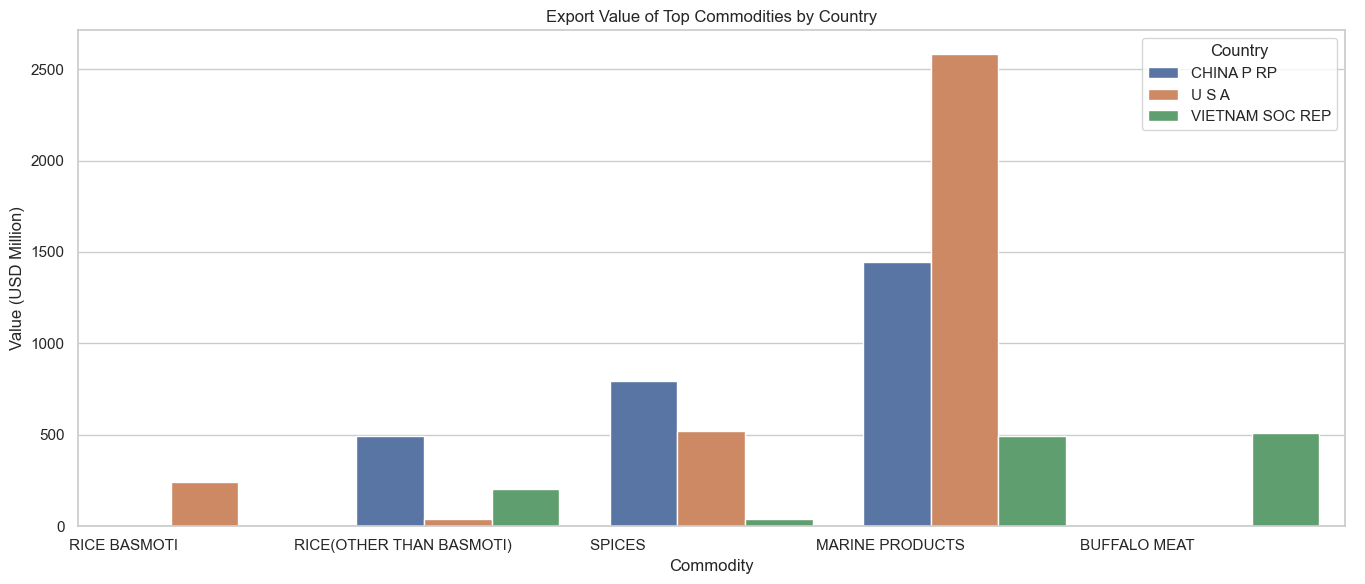

In [31]:
top_countries = df.groupby('COUNTRY')['VALUE_USD_MILLION'].sum().sort_values(ascending=False).head(3).index
top_commodities = df.groupby('COMMODITY_NAME')['VALUE_USD_MILLION'].sum().sort_values(ascending=False).head(5).index

subset_df = df[df['COUNTRY'].isin(top_countries) & df['COMMODITY_NAME'].isin(top_commodities)]

plt.figure(figsize=(14, 6))
sns.barplot(data=subset_df, x='COMMODITY_NAME', y='VALUE_USD_MILLION', hue='COUNTRY')
plt.title("Export Value of Top Commodities by Country")
plt.xlabel("Commodity")
plt.ylabel("Value (USD Million)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

Phase II Start

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clustering_features = ['VALUE_USD_MILLION', 'QUANTITY_KGS', 'PRICE_PER_KG']
df_model = df[clustering_features].copy()

# Handle potential infinite values and drop NaNs
df_model.replace([np.inf, -np.inf], 0, inplace=True)
df_model.dropna(inplace=True)

# --- 2. Create the Target Variable using K-Means Clustering ---
# The clusters are STILL created using all three features to maintain their strategic meaning.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_model[clustering_features])
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df_model['Cluster'] = kmeans.fit_predict(features_scaled)


# --- 3. Prepare Data for a MORE REALISTIC Classifier ---
# THE CHALLENGE: We remove the most powerful feature ('PRICE_PER_KG')
# The model must now predict the price-driven cluster without knowing the price.
X = df_model[['VALUE_USD_MILLION', 'QUANTITY_KGS']]
y = df_model['Cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 4. Train the Random Forest Classifier ---
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


# --- 5. Evaluate the Model's Performance ---
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("--- Realistic Model Evaluation ---")
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Realistic Model Evaluation ---
Model Accuracy: 0.9967

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00         1

    accuracy                           1.00       610
   macro avg       1.00      0.97      0.98       610
weighted avg       1.00      1.00      1.00       610



In [35]:
# --- 6. Analyze Feature Importance ---
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

ValueError: All arrays must be of the same length

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Realistic Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

NameError: name 'feature_importance_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

regression_features = ['QUANTITY_KGS', 'PRICE_PER_KG']
target = 'VALUE_USD_MILLION'

df_reg = df[regression_features + [target]].copy()

# Handle potential infinite values and drop NaNs
df_reg.replace([np.inf, -np.inf], 0, inplace=True)
df_reg.dropna(inplace=True)

# --- 2. Prepare Data for the Regression Model ---
# X contains the features the model will learn from.
X = df_reg[regression_features]
# y is the continuous value we want to predict.
y = df_reg[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")
print("-" * 50)


# --- 3. Train the RandomForestRegressor ---
# Initialize the regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("--- Training the RandomForestRegressor... ---")
# Train the model on the training data
rf_regressor.fit(X_train, y_train)
print("--- Model training complete. ---")
print("-" * 50)


# --- 4. Evaluate the Model's Performance ---
print("--- Evaluating regression model performance... ---")
# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.4f}")
print(" (An R² of 1.0 means the model perfectly predicts the value)")

# Calculate and print Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(" (This is the average error in millions of USD for each prediction)")
print("-" * 50)

Data split into 2440 training samples and 610 testing samples.
--------------------------------------------------
--- Training the RandomForestRegressor... ---
--- Model training complete. ---
--------------------------------------------------
--- Evaluating regression model performance... ---
R-squared (R²) Score: 0.7310
 (An R² of 1.0 means the model perfectly predicts the value)
Mean Absolute Error (MAE): 4.3598
 (This is the average error in millions of USD for each prediction)
--------------------------------------------------


Results visualization saved as 'regression_actual_vs_predicted.png'
--------------------------------------------------


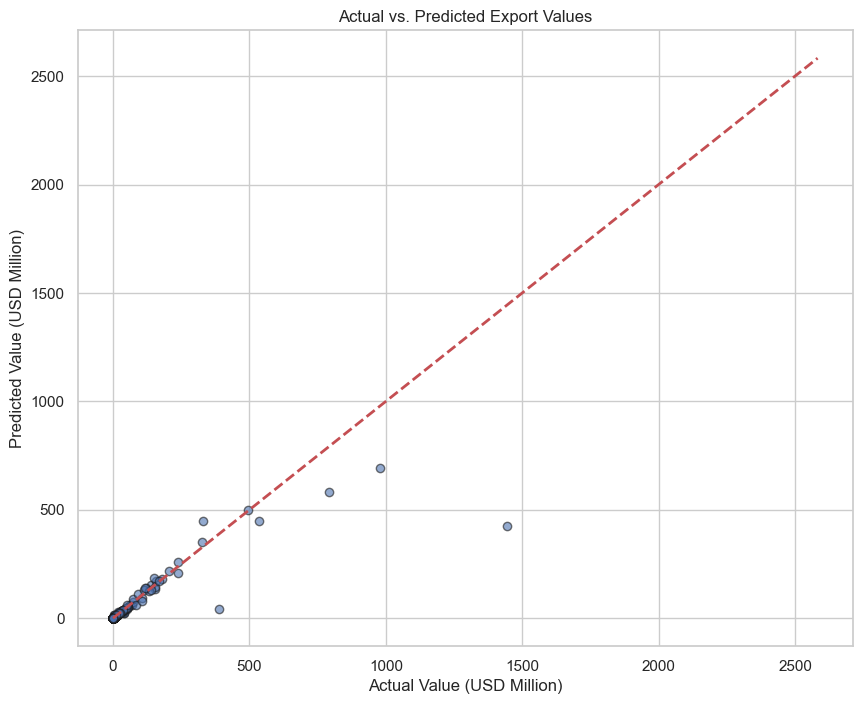

In [38]:
# --- 5. Visualize the Results ---
# Create a scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # Perfect prediction line
plt.xlabel("Actual Value (USD Million)")
plt.ylabel("Predicted Value (USD Million)")
plt.title("Actual vs. Predicted Export Values")
plt.grid(True)
plt.savefig("regression_actual_vs_predicted.png")
print("Results visualization saved as 'regression_actual_vs_predicted.png'")
print("-" * 50)

----- Linear Regression Results -----
MAE  : 23.9921
RMSE : 89.0397
R²   : 0.0154


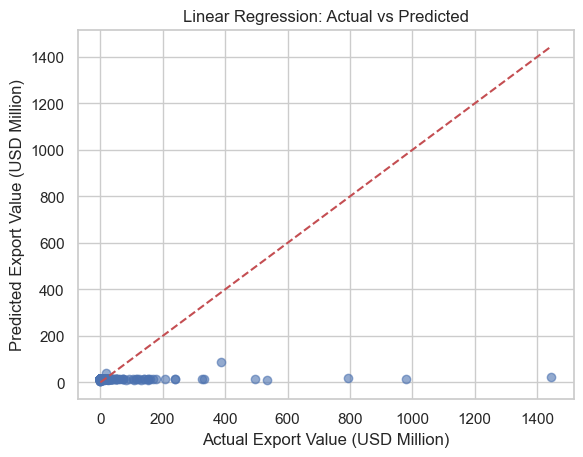

In [39]:
# -------------------------------
# Linear Regression for Export Value Prediction
# -------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure dataset is loaded (replace with your dataframe name if different)
# df = pd.read_excel("Cleaned_Principal_Commodity_Exports.xlsx")

# Features & Target
X = df_model[["QUANTITY_KGS", "PRICE_PER_KG"]]   # independent variables
y = df_model["VALUE_USD_MILLION"]                # target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("----- Linear Regression Results -----")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# Compare Actual vs Predicted visually
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Export Value (USD Million)")
plt.ylabel("Predicted Export Value (USD Million)")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # line y=x for reference
plt.show()

✅ KMeans Clusters created and stored in df_model['Cluster_KM']

----- Logistic Regression Results -----
Accuracy: 0.9639

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       588
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         1

    accuracy                           0.96       610
   macro avg       0.32      0.33      0.33       610
weighted avg       0.93      0.96      0.95       610



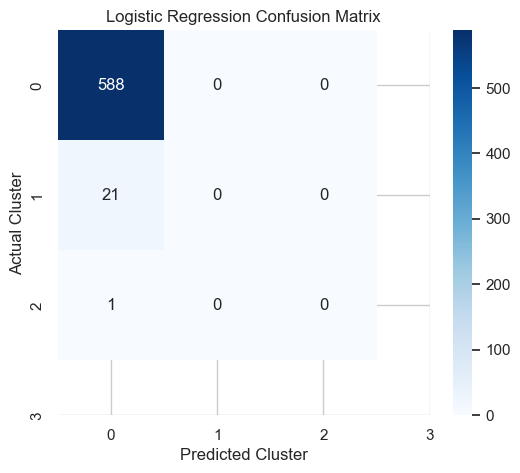

In [ ]:
# -----------------------------------------
# KMeans + Logistic Regression Pipeline
# -----------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. KMeans Clustering (Ground Truth for Classification)
# ------------------------------
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(
    df_model[["VALUE_USD_MILLION", "QUANTITY_KGS", "PRICE_PER_KG"]]
)

kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42, n_init=10)
df_model["Cluster_KM"] = kmeans.fit_predict(X_all_scaled)

# ------------------------------
# 2. Logistic Regression to Predict Clusters
# ------------------------------
# Features: Value & Quantity (exclude PRICE_PER_KG)
X = df_model[["VALUE_USD_MILLION", "QUANTITY_KGS"]]
y = df_model["Cluster_KM"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=200, multi_class="multinomial", random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# ------------------------------
# 3. Evaluation
# ------------------------------
print("\n----- Logistic Regression Results -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Cluster")
plt.title("Logistic Regression Confusion Matrix")
plt.show()